# Contents

### Importing Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Step 1: Loading the image

In [2]:
#read image
image = cv2.imread('test_image.jpg',1)

In [3]:
#copy image
lane_image = np.copy(image)

In [4]:
#display the loaded image
cv2.imshow("result",image)
#to stop the window from disappearing in seconds
cv2.waitKey(0)

-1

## Step 2: Grayscale conversion

This is done to reduce the number of channels during edge detection.

In [5]:
gray = cv2.cvtColor(lane_image, cv2.COLOR_RGB2GRAY)

In [6]:
#display the loaded image
cv2.imshow('result',gray)
cv2.waitKey(0)

-1

## Step 3: Gaussian Blur

In order to reduce noises, a Gaussian filter is applied.

In [7]:
blur = cv2.GaussianBlur(gray, (5,5), 0)

In [8]:
#display the loaded image
cv2.imshow('result',blur)
cv2.waitKey(0)

-1

# Step 4: Canny Detection

In [9]:
canny_image = cv2.Canny(blur, 50, 150)

In [10]:
#display the loaded image
cv2.imshow('result',canny_image)
cv2.waitKey(0)

-1

# Milestone: Defining canny function

In order to retain the coherence of the code, a function is created for the above 4 steps.

In [11]:
def canny(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    canny = cv2.Canny(blur, 50, 150)
    return canny

In [12]:
#An image is loaded into the canny function same as above
image = cv2.imread('test_image.jpg',1)
lane_image = np.copy(image)
canny_image = canny(lane_image)

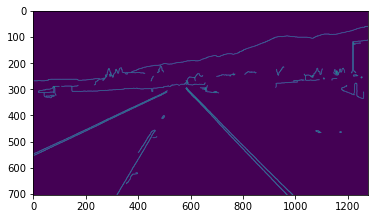

In [13]:
#This time, it is displayed using a function from plt instead of cv2
plt.imshow(canny_image)
plt.show()

## Step 5: Defining region of interest

In [14]:
def region_of_interest(image):
    height = image.shape[0]
    polygons = np.array([[(200,height), (1100,height), (550,250)]])
    mask = np.zeros_like(image) #we apply the above polygon on a mask
    #mask will have same pixels all black but same dimensions
    cv2.fillPoly(mask, polygons,255) #fill mask with triangle and color is white
    return mask

In [15]:
cv2.imshow('result',region_of_interest(canny_image))
cv2.waitKey(0)

-1

## Step 6: Overlapping the images

This requires adding another line to the function above.

## Milestone: Defining region of interest

In [16]:
def region_of_interest(image):
    height = image.shape[0]
    polygons = np.array([[(200,height), (1100,height), (550,250)]])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, polygons,255)
    masked_image = cv2.bitwise_and(image, mask)
    return masked_image

In [17]:
#An image is loaded into the canny function same as above
image = cv2.imread('test_image.jpg',1)
lane_image = np.copy(image)
canny_image = canny(lane_image)
cropped_image = region_of_interest(canny_image)

In [18]:
cv2.imshow('result',region_of_interest(cropped_image))
cv2.waitKey(0)

-1

## Step 7: Hough Transform

In [19]:
#np.pi is used because we need the parameter in radians
lines = cv2.HoughLinesP(cropped_image, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5)

In [20]:
def display_lines(image,lines):
    line_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1,y1,x2,y2 = line.reshape(4)
            cv2.line(line_image, (x1,y1), (x2,y2), (255,0,0), 10)
    return line_image

In [21]:
line_image = display_lines(lane_image, lines)

In [22]:
cv2.imshow('result',line_image)
cv2.waitKey(0)

-1

In [23]:
combo_image = cv2.addWeighted(lane_image, 0.8, line_image, 1, 1)
cv2.imshow("result", combo_image)
cv2.waitKey(0)

-1

## Step 8: Optimization

In [24]:
def make_coordinates(image, line_parameters):
    slope, intercept = line_parameters
    y1 = image.shape[0]
    y2 = int(y1*(3/5))
    x1 = int((y1 - intercept)/slope)
    x2 = int((y2 - intercept)/slope)
    return np.array([x1, y1, x2, y2])

In [25]:
def average_slope_intercept(image, lines):
    left_fit = []
    right_fit = []
    for line in lines:
        x1, y1, x2, y2 = line.reshape(4)
        parameters = np.polyfit((x1,x2), (y1,y2), 1)
        print(parameters)
        slope = parameters[0]
        intercept = parameters[1]
        if slope < 0:
            left_fit.append((slope, intercept))
        else:
            right_fit.append((slope,intercept))
    left_fit_average = np.average(left_fit, axis = 0)
    right_fit_average = np.average(right_fit, axis = 0)
    left_line = make_coordinates(image, left_fit_average)
    right_line = make_coordinates(image, right_fit_average)
    return np.array([left_line, right_line])

In [26]:
def display_new_lines(image, lines):
    line_image = np.zeros_like(image)
    if lines is not None:
        for x1,y1,x2,y2 in lines:
            cv2.line(line_image, (x1,y1), (x2,y2), (255,0,0), 10)
    return line_image

In [27]:
averaged_lines = average_slope_intercept(line_image, lines)

[   1. -286.]
[   1.03448276 -302.27586207]
[  -1.672 1238.04 ]
[   1.02564103 -299.        ]
[   1.05 -320.5 ]
[   1.05970149 -321.40298507]
[   1. -288.]
[   1.05797101 -321.43478261]
[   1.025 -293.175]
[  -1.5483871  1163.96774194]
[   0.96078431 -250.1372549 ]
[   1.05454545 -317.94545455]
[   1. -287.]


In [28]:
new_line_image = display_new_lines(line_image, averaged_lines)
cv2.imshow('result',new_line_image)
cv2.waitKey(0)

-1

In [29]:
combo_image2 = cv2.addWeighted(lane_image, 0.8, new_line_image, 1, 1)
cv2.imshow("result", combo_image2)
cv2.waitKey(0)

-1

In [30]:
cap = cv2.VideoCapture("test2.mp4")
while(cap.isOpened()):
    _, frame = cap.read() #decode every video frame
    canny_image = canny(frame)
    cropped_image = region_of_interest(canny_image)
    lines = cv2.HoughLinesP(cropped_image, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5)
    line_image = display_lines(frame, lines)
    combo_image = cv2.addWeighted(frame, 0.8, line_image, 1, 1)
    cv2.imshow("result", combo_image)
    if cv2.waitKey(1) & 0xFF == ord('q') :
        break
        
cap.release()
cv2.destroyAllWindows()
